# Analyzing Mansfield's Writing Style in *The Garden Party and Other Short Stories*
### Crystal Kim | August 2020
#### DIGHUM 150C: Introduction to Computational Literary Analysis | Jonathon Reeve

For my final project, I am taking a closer look at the short stories we read in *The Garden Party and Other Short Stories* by Katherine Mansfield. These stories—"The Garden Party", "The Daughters of the Late Colonel", "The Young Girl", "Marriage a la Mode", "Her First Ball", and "An Ideal Family"—have some similar themes, but are generally about different types of characters. I want to examine how the stories differ in terms of writing style, based on the fact that they are all written by the same author, but have different plots, narrators, characters, etc. I know the six stories are not identical, but I hope to find some patterns.

In [1]:
import nltk
from collections import Counter
import pandas as pd

from nltk.sentiment import SentimentIntensityAnalyzer, sentiment_analyzer

## Corpus

In [2]:
mansfield = open('content_texts_garden-party.md').read()

In [3]:
# Separate the short stories
mansfieldCorpus = {'The Garden Party': mansfield[74254:104246],
                  'The Daughters of the Late Colonel': mansfield[104246:144616],
                  'The Young Girl': mansfield[162965:174966],
                  'Marriage a la Mode': mansfield[188680:210350],
                  'Her First Ball': mansfield[238576:252801],
                  'An Ideal Family': mansfield[296646:310394]}

In [4]:
# the dictionary value is list of tokenized text
mansfieldCorpusTokens = {}
for text in mansfieldCorpus:
    mansfieldCorpusTokens[text] = nltk.word_tokenize(mansfieldCorpus[text])

In [5]:
# the dictionary value is list of tokenized text (only alphabetical tokens)
mansfieldTokenAlpha = {}
for text in mansfieldCorpusTokens:
    alphaList = []
    for token in mansfieldCorpusTokens[text]:
        if token.isalpha():
            alphaList.append(token)
           
    mansfieldTokenAlpha[text] = alphaList

## Type Token Ratio

Type Token Ratio (TTR) is a ratio calculated by dividing the number of distinct tokens by the number of tokens in the entire text. This can be useful in understanding variation in vocabulary used in a text. 

In [6]:
def typeTokenRatio(tokens):
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

In [7]:
for text in mansfieldCorpusTokens:
    print(text, ':', typeTokenRatio(text))

The Garden Party : 0.75
The Daughters of the Late Colonel : 0.5151515151515151
The Young Girl : 0.9285714285714286
Marriage a la Mode : 0.5555555555555556
Her First Ball : 0.7857142857142857
An Ideal Family : 0.8


I calculated the TTR for each of the six short stories to observe the variation of vocabulary that Mansfield writes. "The Young Girl" has the highest TTR with a ratio of 0.92, while the lowest is 0.51 from "The Daughters of the Late Colonel". This shows that Mansfield uses more distinct words or tokens in "The Young Girl" than any of the other stories.

This helps us understand that Mansfield does not have a completely uniform selection of words across different works; she uses different vocabulary depending on the characters and plot.

## Most common POS tags

In [8]:
def posCount(tokenList):
    posTagged = nltk.pos_tag(tokenList)
    onlyPOS = []
    for token in posTagged:
        onlyPOS.append(token[1])
    result = Counter(onlyPOS).most_common(3)
    
    individualDict = {}
    for pair in result:
        individualDict[pair[0]] = pair[1]/len(tokenList)
    return individualDict

In [9]:
topPOS = {}
for story in mansfieldTokenAlpha:
    topPOS[story] = posCount(mansfieldTokenAlpha[story])

In [10]:
posDf = pd.DataFrame(topPOS)

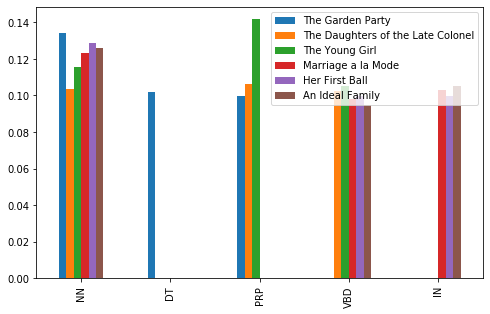

In [11]:
posDf.plot(kind='bar',figsize=(8,5))

`NN`: noun, singular

`DT`: determiner

`PRP`: personal pronoun

`VBD`: verb, past tense

`IN`: preposition / subordinating conjunction

POS tagging is not the most useful tool to analyze writing style, but it can still provide some insight on which parts of speech are used most frequently. I originally produced a data frame using the raw counts of POS tags, but because the short stories all have different lengths, I decided to use the frequency of the three most common POS tags. I plotted this data frame above, indicating the frequencies of the three most frequent POS tags for each short story. Underneath the plot, I included the meanings of the POS abreviations that appear in the visual.

I expected singular nouns and past tense verbs to be the most frequent, which is somewhat supported by the bar plot. The only POS tag that is of the most frequent across all six texts is the singular noun. Past tense verbs are the next most frequent across most texts, except for "The Garden Party". Instead of past tense verbs, "The Garden Party" has a high frequency of determiners, which is unique in comparison to the other stories. 

Another interesting observation is that "The Young Girl" has more personal pronouns than singular nouns, which helps indicate how character-orientated the plot is. A lot of the dialogue consists of "I", "you", and "she", but the high frequency of personal pronouns could be due to the fact that the narrator speaks in the first-person and the story revolves around descriptions of characters, specifically Mrs. Raddick's daughter.

## Most Common n-grams

In [12]:
def commonNgrams(tokens, n):
    ngrams = nltk.ngrams(tokens,n)
    ngramsList = list(ngrams)
    return Counter(ngramsList).most_common(3)

In [13]:
for tokens in mansfieldTokenAlpha:
    listOfNgrams = []
    listOfNgrams.append(commonNgrams(mansfieldTokenAlpha[tokens],4))
    print(tokens, '\n', listOfNgrams, '\n')

The Garden Party 
 [[(('on', 'the', 'back', 'of'), 3), (('out', 'of', 'the', 'room'), 3), (('the', 'only', 'flowers', 'that'), 2)]] 

The Daughters of the Late Colonel 
 [[(('still', 'very', 'fond', 'of'), 4), (('very', 'fond', 'of', 'meringues'), 4), (('At', 'any', 'rate', 'not'), 3)]] 

The Young Girl 
 [[(('on', 'the', 'steps', 'a'), 2), (('to', 'go', 'back', 'with'), 2), (('But', 'just', 'as', 'the'), 2)]] 

Marriage a la Mode 
 [[(('What', 'have', 'you', 'got'), 2), (('to', 'the', 'Royal', 'Academy'), 2), (('in', 'the', 'new', 'way'), 2)]] 

Her First Ball 
 [[(('said', 'the', 'fat', 'man'), 7), (('it', 'would', 'never', 'be'), 2), (('sitting', 'on', 'the', 'veranda'), 2)]] 

An Ideal Family 
 [[(('to', 'be', 'in', 'the'), 2), (('Charlotte', 'and', 'the', 'girls'), 2), (('and', 'the', 'girls', 'were'), 2)]] 



I decided to examine common n-grams in the short stories to see what types of phrases Mansfield uses. If an n-gram appears multiple times, we can see how repetitive Mansfield, the narrator, or characters are. The `commonNgrams` function returns the top three most common n-grams, and I am able to adjust how many (n) tokens to look at. I decided to make n = 4 because I found—through trial—that four-grams are the longest n-gram that occur more than once in all six of the texts. They aren’t too repetitive, but in "Her First Ball", the phrase “said the fat man” appears 7 times. These seven instances all refer to how the man addresses Leila as "little lady".

## Longest n-gram

In [14]:
def longest_ngram(tokens):
    longest = None
    for num in range(4, 15):
        counter = Counter(nltk.ngrams(tokens, num)).most_common(1)
        if counter[0][1] < 4:
            longest = counter[0]
            break
    print(longest)

In [15]:
for story in mansfieldTokenAlpha:
    print(story,':'),longest_ngram(mansfieldTokenAlpha[story])

The Garden Party :
(('on', 'the', 'back', 'of'), 3)
The Daughters of the Late Colonel :
(('his', 'father', 'is', 'still', 'very', 'fond'), 3)
The Young Girl :
(('on', 'the', 'steps', 'a'), 2)
Marriage a la Mode :
(('What', 'have', 'you', 'got'), 2)
Her First Ball :
(('little', 'lady', 'said', 'the', 'fat'), 2)
An Ideal Family :
(('to', 'be', 'in', 'the'), 2)


To extend on the analysis of n-grams, I found the longest n-gram that appears more than once for each of the stories. 

The longest n-gram that is repeated in "Her First Ball" is "little lady said the fat", without any punctuation, which supports the most common 4-gram from the previous function. The phrase "said the fat man" is repeated several times in the short story, and this shows his dialogue ends with "little lady" two times. I do not understand why the longest n-gram for "Her First Ball" is only a 5-gram and not a 6-gram with the alphatical tokens "little", "lady", "said", "the", "fat", and "man". When looking at the story, the word "man" is included in both instances.

I run into this same issue in finding the longest repeated n-gram for "The Daughters of the Late Colonel". The `longest_ngram` function reveals that the phrase "his father is still very fond" appears three times in this short story. However, when directly looking at the text, the phrase extends as "his father is still very fond of meringues" all three times. My function stops itself as it assumes there are no n-grams with an n value greater than 15, but the phrase "his father is still very fond of meringues" would only be an 8-gram. I tried to adjust the function itself to observe if the for loop is being stopped too early, but I was unable to correct it.

Assuming that the other n-grams are accurate

## Sentiment Analysis
Sentiment analysis is a technique used to identify positive, negative, and neutral sentiments in a text.

In [16]:
sentimentAnalyzer = SentimentIntensityAnalyzer()

In [17]:
def getSentiment(text):
    return sentimentAnalyzer.polarity_scores(text)['compound']

In [18]:
import matplotlib.pyplot as plt

In [19]:
storyTitles = ['The Garden Party', 'The Daughters of the Late Colonel','The Young Girl',
                                  'Marriage a la Mode','Her First Ball','An Ideal Family']

In [20]:
storyParas = {}
for title in mansfieldCorpus:
    paragraphs = mansfieldCorpus[title].split('\n\n')
    storyParas[title] = paragraphs

In [21]:
storySentiments = pd.DataFrame([[getSentiment(para) for para in storyParas[title]] for title in storyTitles], index=storyTitles)

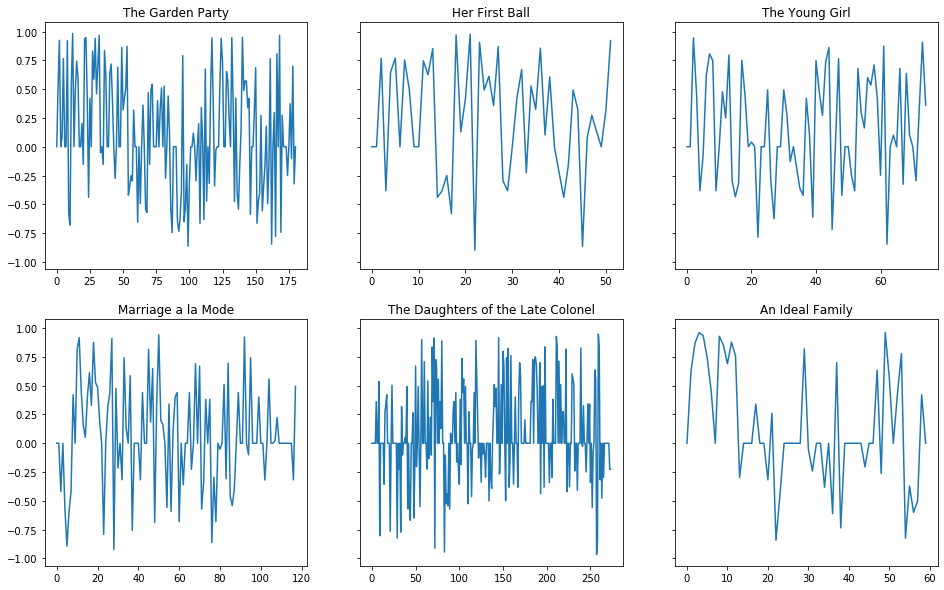

In [22]:
fig, axs = plt.subplots(2,3,sharey=True) # sharey makes the subplots share the same y axis
fig.set_size_inches(16,10)

for i in range(len(storyParas)):
    axs[i%2,i%3].plot(storySentiments.iloc[i],figure=fig)
    axs[i%2,i%3].set_title(storySentiments.index[i])

I produced these sentiment analysis plots to better understand the stories and compare their sentiments.

In the process of creating the visualizations, I used `plt.subplot` from `matplotlib` to display six different subplots. 

The stories do not have an equal number of paragraphs, which is why some plots look more dense than others. Overall, there is no distinct pattern across the stories. However, an interesting point in looking at the progression of sentiments by paragraph is how polarized a story is. For example, "Marriage a la Mode" seems to have the most oscillation, with the sentiment value changing from positive to negative almost every other paragraph. This could be a representation of how different William and Isabel are, especially in interacting with Isabel's friends. It could also be a reflection of the structure of dialogue; a lot of the paragraphs are one sentence-long statements within a conversation, which contrasts the longer paragraphs in "The Garden Party". 

The plot for "An Ideal Family" is another case that can be supported by the types or styles of paragraphs as well as the progression of the plot. Mansfield starts the story with longer paragaphs explaining how Mr. Neave seems to be an ideal man with an ideal family, which explains the positive or neutral sentiments for the first third of the short story. Later, we see Mr. Neave interacting with his family, and he is described to be tired and seems out of place. This occurs near the halfway (30-40th paragraphs) mark, which is where the subplot drops.

Visualizations of sentiment analysis can express the emotions or positive/negative polarity throughout the text. However, using this computational method alone would also not be sufficient. In “What Was ‘Close Reading’?”, Barbara Herrnstein Smith writes, “Reading individual texts with attention to their linguistic features and rhetorical operations is very different … from subjecting large bodies of digitized materials to the sorts of computational processes now wittily (and mischievously) called ‘distant reading’” (57). Smith specifcially uses the word "mischievously" to indicate that distant reading, or using computational techniques to analyze text, is a form of cheating literary analysis because it does not reveal the whole picture.

## PCA
Principal Component Analysis (PCA) is a method that condenses data (frequent words applying Tf-IDF scores) into only two dimensions, which helps simplify the relationships between each point (the six documents).

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [24]:
mansfieldTitles = ['The Garden Party', 'The Daughters of the Late Colonel','The Young Girl','Marriage a la Mode','Her First Ball','An Ideal Family']

#### Tf-IDF
Term frequency-inverse document frequency (Tf-IDF) reflects the value or importance of a word by taking into account the frequency in one single text and the frequency of the term across all the documents in a corpus. I am producing a matrix of Tf-idf scores to use for PCA.

In [25]:
tfidfVectorizer = TfidfVectorizer(max_features=400)

In [26]:
mansMatrix = tfidfVectorizer.fit_transform(mansfieldCorpus.values())

In [27]:
denseMansfieldMatrix = mansMatrix.todense()

In [28]:
mansfieldWordNames = tfidfVectorizer.get_feature_names()

In [29]:
mansDf = pd.DataFrame(denseMansfieldMatrix, columns=mansfieldWordNames, index=mansfieldTitles)

#### PCA:

In [30]:
pca = PCA(n_components=2)

In [31]:
mansfieldReduced = pca.fit_transform(denseMansfieldMatrix)

In [32]:
mansfieldDf = pd.DataFrame(mansfieldReduced, index=mansfieldTitles, columns=['First Component','Second Component'])

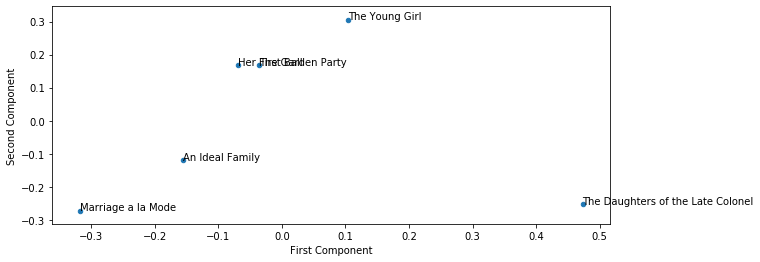

In [33]:
ax = mansfieldDf.plot(kind='scatter',x='First Component',y='Second Component', figsize=(10,4))
for title, points in mansfieldDf.iterrows():
    ax.annotate(title,points) 

"Her First Ball" and "The Garden Party" are the most closely related to each other. This makes sense because both stories are about the process of getting ready for an event and the emotions that come with it. Beyond that, the stories have some characters in common: in "The Garden Party", the Sheridan family is hosting a party, and in "Her First Ball", the Sheridan daughters take Leila to the ball in the city.

The only short story that is noticably out of the norm is "The Daughters of the Late Colonel". ("Marriage a la Mode" and "The Young Girl" are also pretty far away from each other on the plot, but the two seem more relevant to each other because the other stories are of similar distance to each other.) All six stories seem similar as their plots all revolve around family and their lives. Even with close reading, it is difficult to specify why this story is singled out. This could be attributed to the focus on death, or potentially the difference in the structure of the story with short chapters discussing the events of several days.

PCA is able to show us relations between the six stories that are difficult to observe with only close reading. For example, I would not expect "The Daughters of the Late Colonel" to appear that unrelated or different from the other stories. Once again, it is unclear what causes these results, but we can use both close and distant reading to help explain why the sentiment plots look so different.

# Conclusion

I wanted to look at six different stories written by Katherine Mansfield as a case of how an author's writing style can differ across multiple works. By using different computational methods, I aimed to map out how similar or different the short stories are. The visualization produced with PCA is the most compelling to me because it presents the relationships between the texts, purely based on the language used. This plot alone is able to show that there are some similarities or close relationships, specifically between "The Garden Party" and "Her First Ball".

The other computational techniques that I applied to the texts support my finding that the stories appear to have different writing styles, but also add to the interpretation of Mansfield as an author. The analysis with n-grams reveal that Mansfield does not repeat phrases very often, and the type-token ratios indicate how she writes depending on the sophistication of the characters or the setting.

I hope to apply similar analysis techniques to a different group of short stories (potentially *Dubliners*) to gain a better understanding of how authors in general write.

# Works Cited

Smith, Barbara Herrnstein. “What Was ‘Close Reading’?: A Century of Method in Literary Studies.” Minnesota Review, 2016, pp. 57–75.